<a href="https://colab.research.google.com/github/wbssdi01/GEE/blob/main/End2End_ML_Lulc_using_rf_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Install Rasterio (library, pronounced as Raster-io)

In [ ]:
pip install rasterio

# Import libraries: rasterio; seaborn and matplotlib (for visualisation) and numpy (for numerical operations)

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import rasterio
from rasterio import plot
import pandas as pd

# Input raster: Satellite image and Counting the number of bands in the image

In [ ]:
# Input raster
mss=rasterio.open('/content/drive/MyDrive/Aranyaka/Advance course/Data/final_data/roi_data.tif')

In [ ]:
# Counting the number of bands in the image
mss.count

# Separating and storing the metadata of the image 

In [ ]:
# Getting the meta data from the image
georef = mss.meta
print(georef)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 2398, 'height': 2105, 'count': 4, 'crs': CRS.from_epsg(32645), 'transform': Affine(10.0, 0.0, 582160.0,
       0.0, -10.0, 2575510.0)}


In [ ]:
#fig = plt.figure(figsize=(18,12))
#plot.show(mss)

# Read 

In [ ]:
blue=mss.read(1)
green = mss.read(2)
red = mss.read(3)
nir = mss.read(4)

# Band stacking to create a False Color Composite

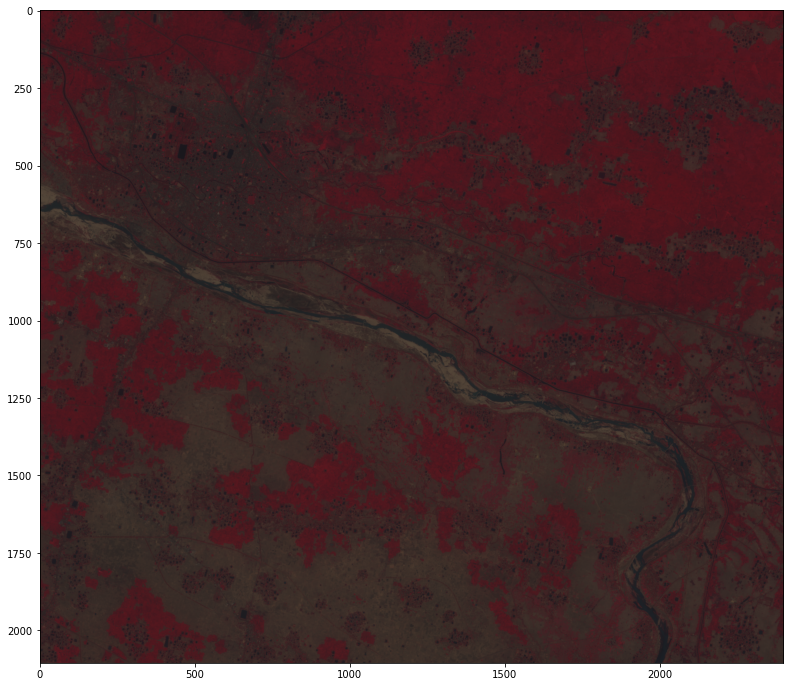

In [ ]:
nrg = np.dstack((nir, red, green))
# Let's see how our color composite looks like
fig = plt.figure(figsize=(18,12))
plt.imshow(nrg)

# Creating image histogram

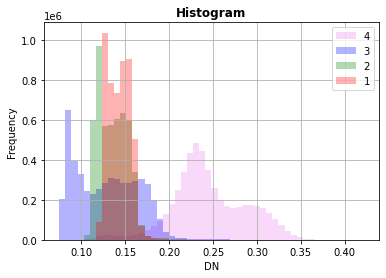

In [ ]:
# Histogram
from rasterio.plot import show_hist
show_hist(mss, bins=50, lw=0.0, stacked=False, alpha=0.3,
      histtype='stepfilled', title="Histogram")

# Dimension of the image scene

In [ ]:
# dimension (shape) of the bands
print(green.shape)
print(red.shape)
print(nir.shape)

# Flattening of Image into an one dimensional array

In [ ]:
# title Default title text
green1=green.flatten()
red1=red.flatten()
nir1=nir.flatten()
blue1=blue.flatten()

(5047790,)


In [ ]:
print(green1.shape)

(5047790,)


# NDVI Calculation

Here 'where'is equivalent to 'if-then-else'statement. This is added in order to avoid error in calculation

In [ ]:
ndvi=np.where((nir+red)==0.0, 0,(nir-red)/(nir+red))

In [ ]:
ndvi

array([[0.58470225, 0.5962513 , 0.5852723 , ..., 0.51220834, 0.49597108,
        0.46990672],
       [0.57819533, 0.59138685, 0.58113015, ..., 0.5517241 , 0.5341125 ,
        0.50719726],
       [0.5636464 , 0.5749736 , 0.5830316 , ..., 0.5414823 , 0.52841866,
        0.51215327],
       ...,
       [0.16149394, 0.1694511 , 0.17271018, ..., 0.12998976, 0.11257271,
        0.11799034],
       [0.16127266, 0.17477874, 0.17461182, ..., 0.11700469, 0.11433002,
        0.11614732],
       [0.26811388, 0.25573295, 0.25450322, ..., 0.13009404, 0.12652639,
        0.12603304]], dtype=float32)

In [ ]:
#title Default title text
ndvi1=ndvi.flatten()

In [ ]:
#@title Default title text
print(ndvi1.shape)

(5047790,)


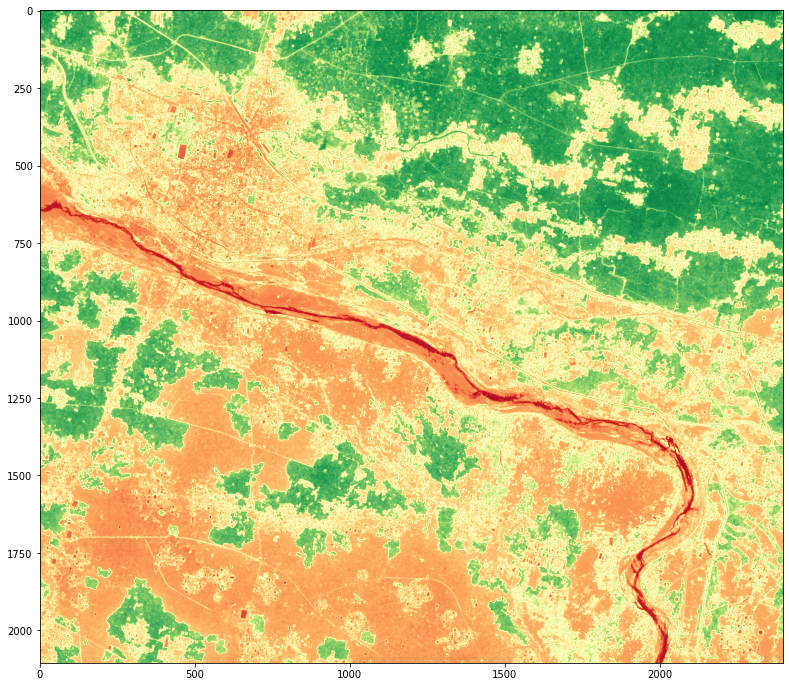

In [ ]:
fig = plt.figure(figsize=(18,12))
plt.imshow(ndvi, cmap='RdYlGn') # imshow - show image, cmap - visualisation parameter (red, yellow, green)

# List of all bands of the image along with ndvi band

In [ ]:
#@title List of all bands
blue_list=blue1.tolist()
green_list=green1.tolist()
red_list=red1.tolist()
nir_list=nir1.tolist()
ndvi_list=ndvi1.tolist()
#dem_list=dem.tolist()


In [ ]:
red_list

[0.08089999854564667,
 0.07970000058412552,
 0.08110000193119049,
 0.08079999685287476,
 0.07970000058412552,
 0.07980000227689743,
 0.07999999821186066,
 0.07959999889135361,
 0.07989999651908875,
 0.08110000193119049,
 0.08079999685287476,
 0.08049999922513962,
 0.08129999786615372,
 0.08089999854564667,
 0.07959999889135361,
 0.08009999990463257,
 0.07930000126361847,
 0.08110000193119049,
 0.08169999718666077,
 0.08110000193119049,
 0.08070000261068344,
 0.07970000058412552,
 0.08100000023841858,
 0.08070000261068344,
 0.08089999854564667,
 0.08240000158548355,
 0.08219999819993973,
 0.08100000023841858,
 0.08049999922513962,
 0.0803999975323677,
 0.07940000295639038,
 0.08070000261068344,
 0.08020000159740448,
 0.0803999975323677,
 0.08150000125169754,
 0.0820000022649765,
 0.08190000057220459,
 0.08060000091791153,
 0.0812000036239624,
 0.0812000036239624,
 0.08209999650716782,
 0.08299999684095383,
 0.08240000158548355,
 0.08110000193119049,
 0.08309999853372574,
 0.081699997186

# Read the label layer. In this example the label is the lulc raster. 

In [ ]:
# Label layer
lulc=rasterio.open("/content/drive/MyDrive/Aranyaka/Advance course/Data/test.tif")
lulc=lulc.read(1)

# Display the shape of the lulc raster

In [ ]:
lulc.shape

(2105, 2398)

In [ ]:
#title Flatten lulc
lulc_1=lulc.flatten()
lulc_1.shape

(5047790,)

In [ ]:
#fig = plt.figure(figsize=(18,12))
#plot.show(lulc)

In [ ]:
# title 
def discrete_matshow2(data):
    #get discrete colormap
    cmap = plt.get_cmap('RdYlGn', np.max(data)-np.min(data)+1)
    # set limits .5 outside true range
    plt.figure(figsize=(18,12)) ## increase fig size
    mat = plt.matshow(data,cmap=cmap,vmin = np.min(data)-.5, vmax = np.max(data)+.5, fignum=1) ## added fignum
    #tell the colorbar to tick at integers
    plt.colorbar(mat, ticks=np.arange(np.min(data),np.max(data)+1), shrink=0.5) ## added shrink

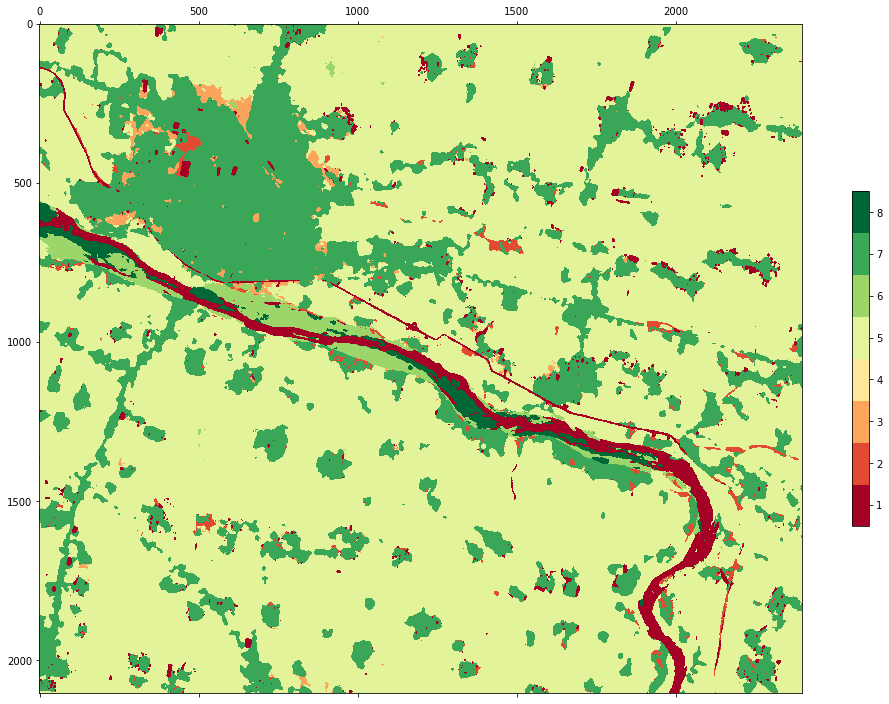

In [ ]:
discrete_matshow2(lulc)

In [ ]:
#title Lulc to list
lulc_list=lulc_1.tolist()

In [ ]:
#creating a dictionary 
df={"blue":blue_list,"green":green_list,"red":red_list,"nir":nir_list,"ndvi":ndvi_list,"lulc":lulc_list}

In [ ]:
#creating dataframe
df=pd.DataFrame(df)

In [ ]:
df.head()

blue   green     red     nir      ndvi  lulc
0  0.1251  0.1138  0.0809  0.3087  0.584702     5
1  0.1248  0.1137  0.0797  0.3151  0.596251     5
2  0.1245  0.1137  0.0811  0.3100  0.585272     5
3  0.1245  0.1127  0.0808  0.3106  0.587123     5
4  0.1243  0.1109  0.0797  0.3231  0.604270     5

In [ ]:
#getting the classes 
df.lulc.unique()

array([5, 7, 1, 3, 2, 6, 4, 8])

In [ ]:
# ML libraries
import sklearn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import r2_score

# Creating the independent and dependent variables 

In [ ]:
#Creating the independent and dependent variables 
x=df.drop('lulc',axis=1)
y=df['lulc']

In [ ]:
x.columns

Index(['blue', 'green', 'red', 'nir', 'ndvi'], dtype='object')

In [ ]:
# Spliting the train and test set in 70/30
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=123)

In [ ]:
x_train.shape

(3533453, 5)

Hyperparameter

n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None

In [ ]:
#Using Random Forest classifier
#Define the hyperparameter of Rf
clf = RandomForestClassifier(n_estimators = 20,
                             max_depth=5, 
                             min_samples_split=2)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(x_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(x_test)
  
# metrics are used to find accuracy or error
from sklearn import metrics  

In [ ]:
#clf.score(x_train,y_train)

In [ ]:
#clf.score(x_test,y_test)

In [ ]:
#Calculating the Accuracy
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.7938754715760098


In [ ]:
#print(classification_report(y_test, y_pred))

In [ ]:
y_test.shape

(1514337,)

In [ ]:
set(y_test)

{1, 2, 3, 4, 5, 6, 7, 8}

In [ ]:
y_test.shape

(1514337,)

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[  19721       0       0       0   14789       0   13978    1348]
 [     47       0       0       0    7684       0    4873       0]
 [     22       0       0       0    7880       0    3156       2]
 [      0       0       0       0       6       0      10       0]
 [   2118       0       0       0 1031325       0   63612     769]
 [    188       0       0       0   15147       0    5930    1775]
 [   2950       0       0       0  159696       0  142785     761]
 [    820       0       0       0    4287       0     294    8364]]


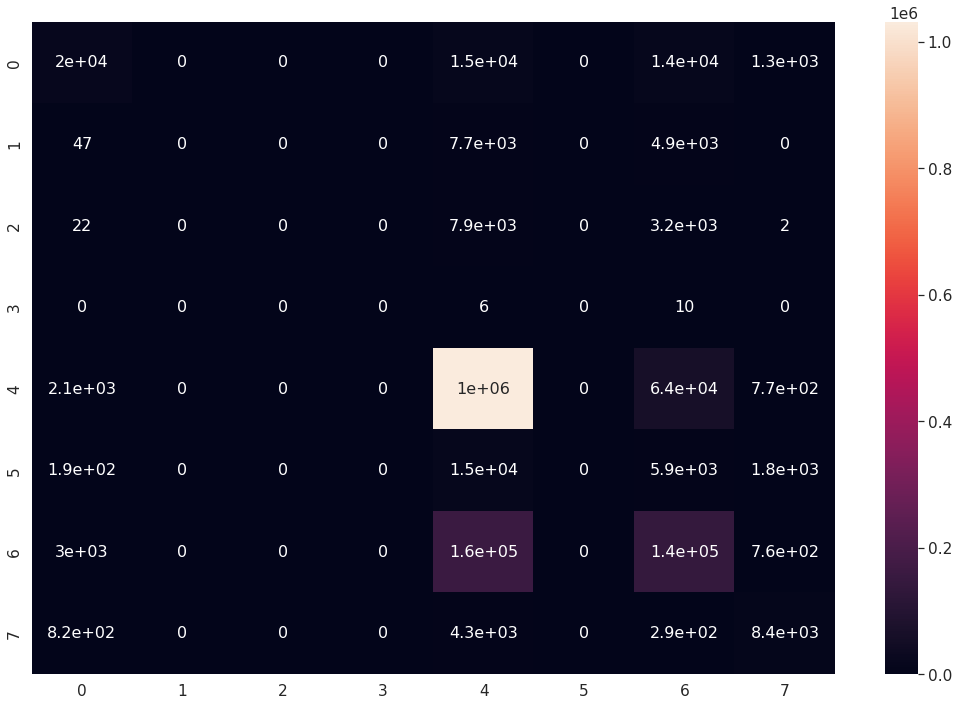

In [ ]:
# title Visualization
array=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(array, range(8), range(8))
plt.figure(figsize=(18,12))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

#plt.show()

In [ ]:
feature_list=list(x.columns)

In [ ]:
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = clf.estimators_[1]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png'); 

In [ ]:
y = clf.predict(x)

In [ ]:
#title Reshape
a=np.reshape(y,(2105, 2398))
print(a.shape)
a.dtype
a=a.astype(np.int16)

(2105, 2398)


In [ ]:
#title Write
import affine

 # Metadata can be copied from existing file if needed
with rasterio.open('/content/drive/MyDrive/Aranyaka/Advance course/Data/predicted_testdata1.tif', 'w',
                   driver='GTiff',
                   dtype=a.dtype,
                    nodata= 0.0,
                    height= 2105,
                    width=2398,
                    count= 1,
                    crs= rasterio.crs.CRS({'init': 'epsg:32645'}),
                    transform=affine.Affine(10.0, 0.0, 582160.0,0.0, -10.0, 2575510.0)) as file:
    file.write(a,1)


In [ ]:
#Predicted image
lulc_pred1=rasterio.open("/content/drive/MyDrive/Aranyaka/Advance course/Data/predicted_testdata1.tif")
lulc_pred1=lulc_pred1.read(1)

In [ ]:
#title Default title text
#fig = plt.figure(figsize=(18,12))
#plot.show(lulc_pred1)

In [ ]:
#@title Visualization
def discrete_matshow2(data):
    #get discrete colormap
    cmap = plt.get_cmap('RdBu', np.max(data)-np.min(data)+1)
    # set limits .5 outside true range
    plt.figure(figsize=(15,12)) ## increase fig size
    mat = plt.matshow(data,cmap=cmap,vmin = np.min(data)-.5, vmax = np.max(data)+.5, fignum=1) ## added fignum
    #tell the colorbar to tick at integers
    plt.colorbar(mat, ticks=np.arange(np.min(data),np.max(data)+1), shrink=0.5) ## added shrink

1. Water

2. Trees

3. Grass

4. Flooded vegetation

5. Crops

6. Scrub/shrub

7. Built Area

8. Bare ground

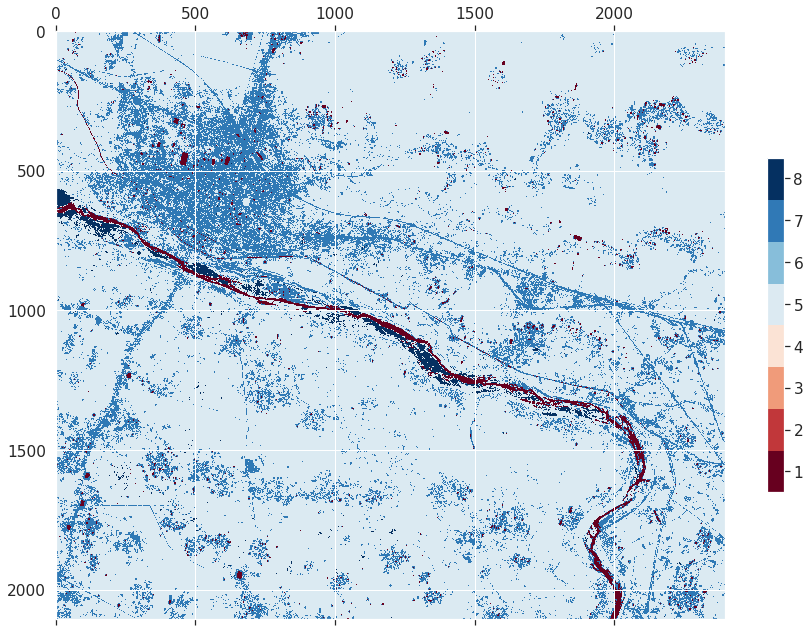

In [ ]:
discrete_matshow2(lulc_pred1)

### Test data

In [ ]:
mss_test=rasterio.open('/content/drive/MyDrive/Aranyaka/Advance course/Data/test_img_clip.tif')

In [ ]:
mss_test.meta

{'count': 4,
 'crs': CRS.from_epsg(32645),
 'driver': 'GTiff',
 'dtype': 'float32',
 'height': 3550,
 'nodata': None,
 'transform': Affine(10.0, 0.0, 566460.0,
       0.0, -10.0, 2525640.0),
 'width': 4048}

In [ ]:
blue_test=mss_test.read(1)
green_test = mss_test.read(2)
red_test = mss_test.read(3)
nir_test = mss_test.read(4)

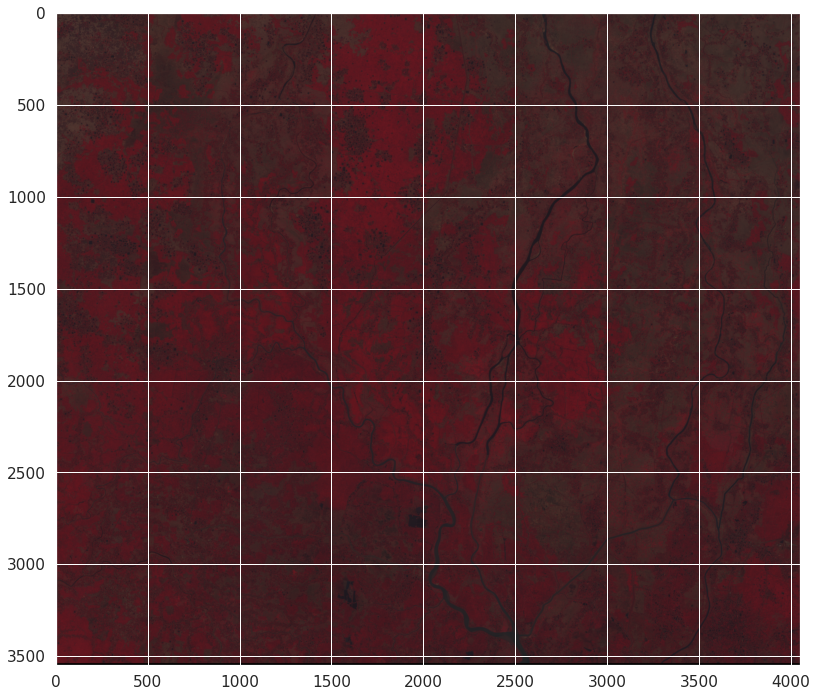

In [ ]:
nrg = np.dstack((nir_test, red_test, green_test))

# Let's see how our color composite looks like
fig = plt.figure(figsize=(18,12))
plt.imshow(nrg)

In [ ]:
print(green_test.shape)
print(red_test.shape)
print(nir_test.shape)

(3550, 4048)
(3550, 4048)
(3550, 4048)


In [ ]:
ndvi_test=np.where((nir_test+red_test)==0.0, 0,(nir_test-red_test)/(nir_test+red_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [ ]:
df1={"blue":blue_list_t,"green":green_list_t,"red":red_list_t,"nir":nir_list_t,"ndvi":ndvi_list_t}

In [ ]:
df=pd.DataFrame(df1)

In [ ]:
y = clf.predict(df)

(3550, 4048)


In [ ]:
lulc_pred=rasterio.open("/content/drive/MyDrive/Aranyaka/Advance course/Data/predicted_new.tif")
lulc_pred=lulc_pred.read(1)

In [ ]:
#fig = plt.figure(figsize=(18,12))
#plot.show(lulc_pred)

1. Water


2. Trees


3. Grass


4. Flooded vegetation


5. Crops

6. Scrub/shrub

7. Built Area


8. Bare ground


9. Snow/Ice

 
10. Clouds



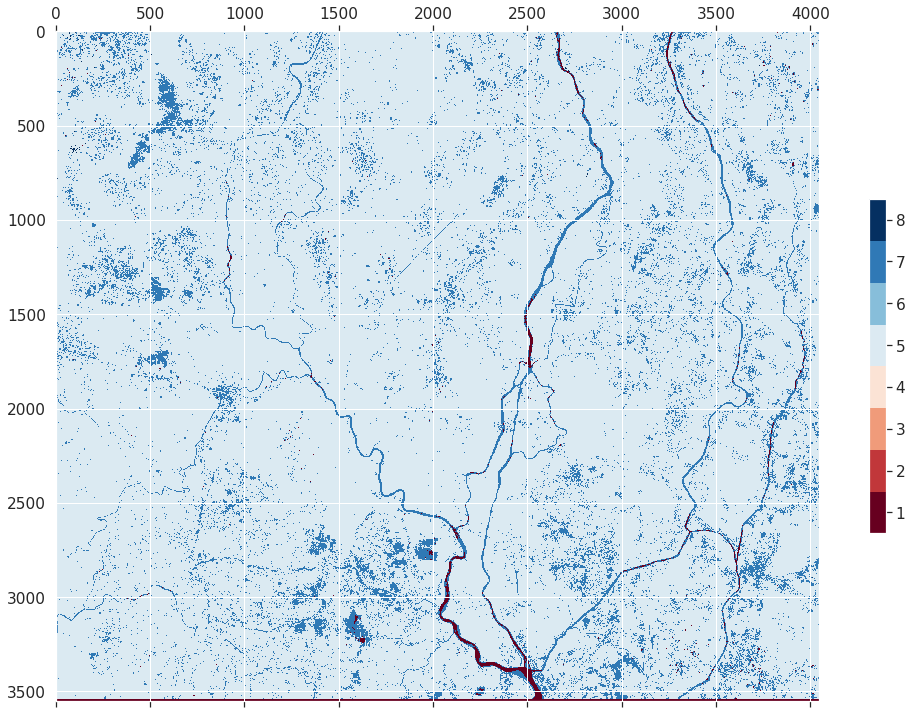

In [ ]:
discrete_matshow2(lulc_pred)

Text(0.5, 1.0, 'Predicted_lulc')

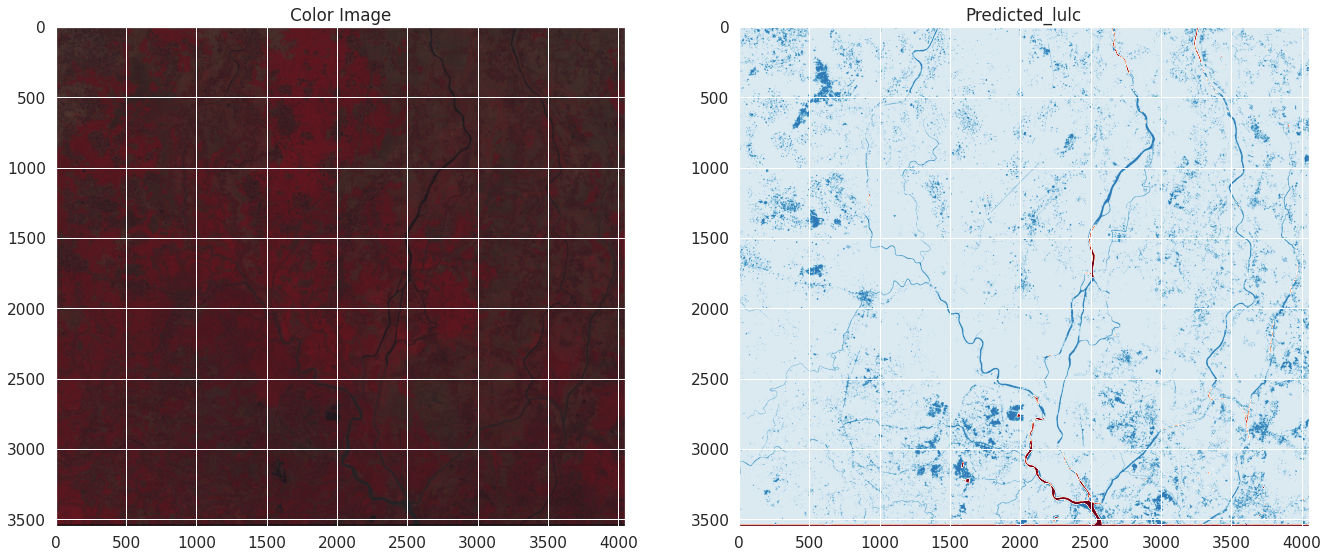

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 20)) 

# Show the color image
axs[0].imshow(nrg)
axs[0].set_title('Color Image')

# Show NDVI
axs[1].imshow(lulc_pred, cmap='RdBu')
axs[1].set_title('Predicted_lulc')

In [ ]:
# Get numerical feature importances
importances = list(clf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: nir                  Importance: 0.34
Variable: ndvi                 Importance: 0.23
Variable: red                  Importance: 0.19
Variable: green                Importance: 0.16
Variable: blue                 Importance: 0.08


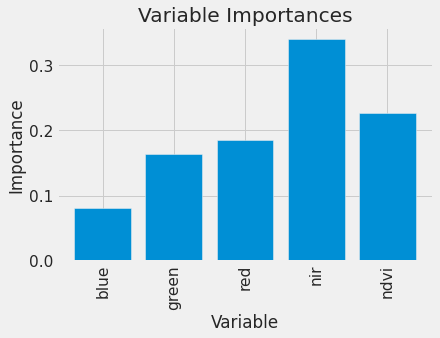

In [ ]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 